In [1]:
!pip install pandas numpy matplotlib seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import os

In [2]:
os.chdir('C:/Users/jesse/OneDrive/Documenten/Thesis/amazon_code')

In [3]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [4]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [7]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [8]:
len(data)

21000

In [9]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

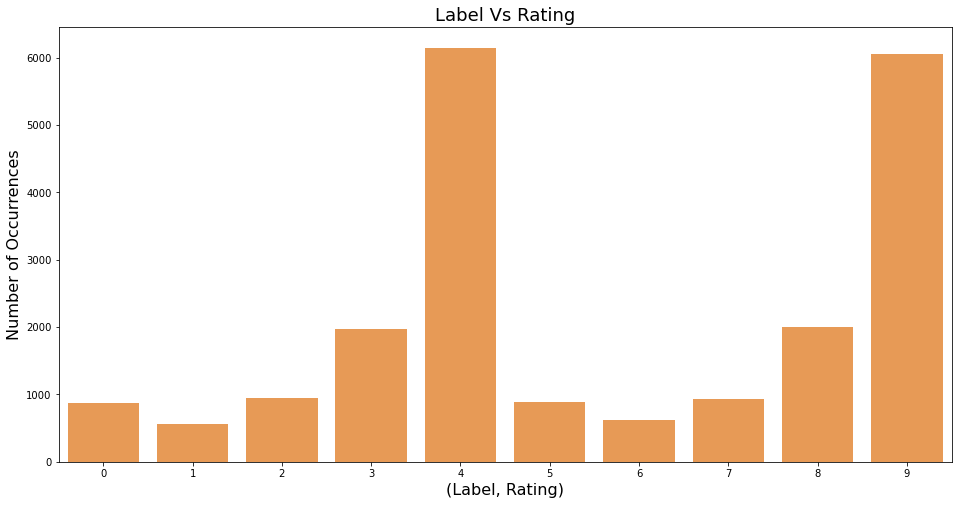

In [10]:
cnt_srs = data.groupby(['LABEL', 'RATING']).size()
cnt_srs = cnt_srs.rename_axis(['LABEL', 'RATING']).reset_index(name='COUNT')

plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs['COUNT'], alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.title('Label Vs Rating', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

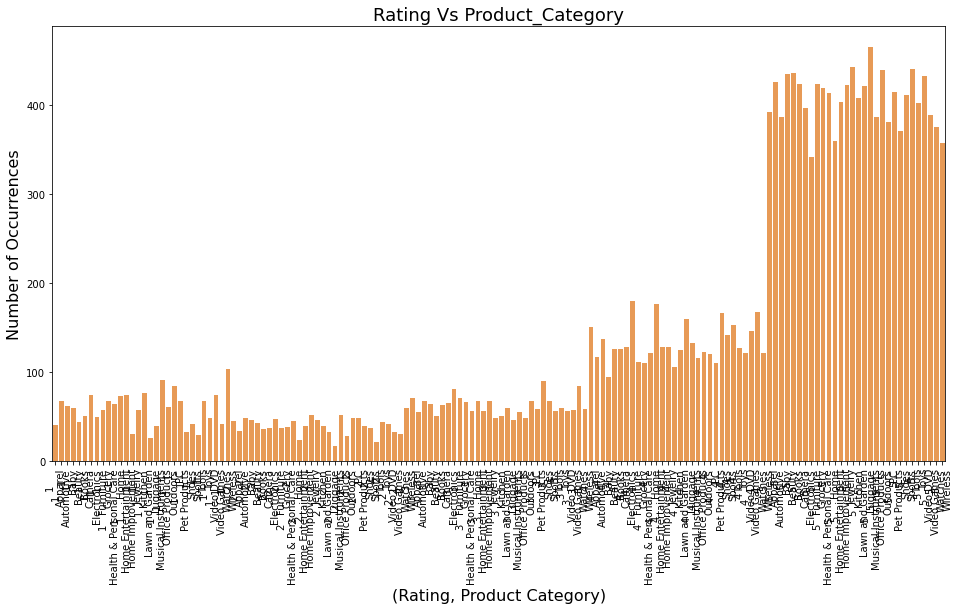

In [11]:
cnt_srs = data.groupby(["RATING", "PRODUCT_CATEGORY"]).size().reset_index(name='counts')

plt.figure(figsize=(16,8))
sns.barplot(x=cnt_srs["RATING"].astype(str) + '\n' + cnt_srs["PRODUCT_CATEGORY"].astype(str), y=cnt_srs["counts"], alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Rating, Product Category)', fontsize=16)
plt.title('Rating Vs Product_Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts().reset_index(name='counts')
cnt_srs

,VERIFIED_PURCHASE,LABEL,counts
0,N,1,7623
1,N,0,1679
2,Y,0,8821
3,Y,1,2877


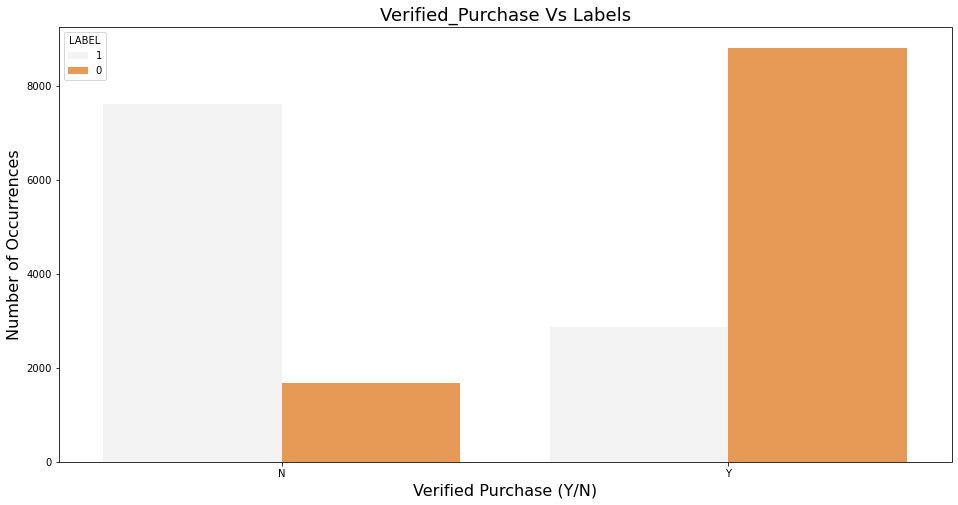

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(x="VERIFIED_PURCHASE", y="counts", hue="LABEL", data=cnt_srs, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Verified Purchase (Y/N)', fontsize=16)
plt.title('Verified_Purchase Vs Labels', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [14]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [15]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)


In [17]:
cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

c:\Users\jesse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


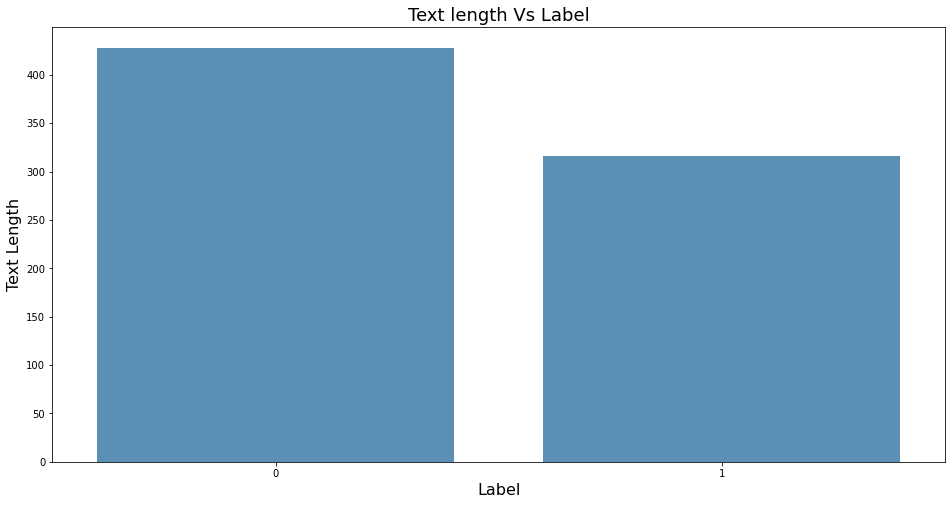

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()